In [1]:
import numpy as np
import cv2
import math
import matplotlib.pyplot as plt

In [9]:
img = np.array([[4, 4, 3, 5, 4],
                [5, 5, 5, 5, 2],
                [5, 6, 6, 6, 2],
                [6, 7, 5, 5, 3],
                [3, 5, 2, 4, 4],
                ])
kernel = np.array([
    [0,	-1,	0],
    [-1,	4,	-1],
    [0,	-1,	0],
])


(3, 3)

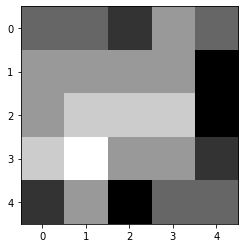

In [5]:
plt.imshow(img, cmap='gray')

In [22]:
def convolution_2d(img, kernel, padding_type='none'):
  h_img, w_img = img.shape
  h_ker, w_ker = kernel.shape
  if(padding_type == 'none'):
    image = img
    h_res, w_res = h_img-h_ker + 1, w_img-w_ker + 1

  elif(padding_type == 'constant'):
    h_res, w_res = img.shape
    kernel_center_i = int((h_ker-1)/2)
    kernel_center_j = int((w_ker-1)/2)

    left_pad = kernel_center_j
    top_pad = kernel_center_i
    right_pad = w_ker - 1 - kernel_center_j
    bottom_pad = h_ker - 1 - kernel_center_i

    image = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)),
                   mode='constant', constant_values=0)
  
  elif(padding_type == 'nearest'):
    h_res, w_res = img.shape
    kernel_center_i = int((h_ker-1)/2)
    kernel_center_j = int((w_ker-1)/2)

    left_pad = kernel_center_j
    top_pad = kernel_center_i
    right_pad = w_ker - 1 - kernel_center_j
    bottom_pad = h_ker - 1 - kernel_center_i

    image = np.pad(img, ((top_pad, bottom_pad), (left_pad, right_pad)),
                   mode='edge')

  else:
    print('invalid padding type')
    return None

  result = np.zeros([h_res, w_res])

  for i in range(h_res):
    for j in range(w_res):
      dot = 0
      for k in range(h_ker):
        for l in range(w_ker):
          dot += image[i+k, j+l]*kernel[k, l]
      result[i, j] = dot

  return result


In [25]:
result = convolution_2d(img, kernel, padding_type='nearest')

In [26]:
result

array([[-1.,  0., -5.,  3.,  1.],
       [ 1.,  0.,  1.,  2., -5.],
       [-2.,  1.,  2.,  6., -5.],
       [ 3.,  6.,  0.,  2., -2.],
       [-5.,  3., -8.,  1.,  1.]])